# Examen Classification 20 Décembre 2023

Notebook à compléter et à déposer sur Tomuss

A ajouter lien vers prompt ChatGPT ou Bard

L'ensemble des ressources (fichiers) nécessaires sont disponible sur le google drive :
https://drive.google.com/drive/folders/1-2S5dzlxJ4ifCGfyutujV0tdofx7L20r?usp=sharing



# Partie I - Geo-localisation

Une carte RSSI ("Received Signal Strength Indication"), qui se traduit en français par "Indication de la force du signal reçu", est un outil de mesure utilisé pour évaluer la puissance du signal radio reçu par un dispositif sans fil, comme un routeur Wi-Fi ou un point d'accès. La carte RSSI mesure la force du signal en décibels et peut être utilisée pour déterminer la qualité de la connexion sans fil. Les cartes RSSI sont souvent utilisées dans les réseaux sans fil pour diagnostiquer les problèmes de connexion et optimiser les performances du réseau.

En plus d'être utilisées pour du diagnostique, les cartes RSSI peuvent également être utilisées pour localiser du matériel. Cela est possible car la force du signal reçu par un dispositif sans fil varie en fonction de la distance entre le dispositif et le point d'accès. En mesurant la force du signal reçu par un dispositif à partir de plusieurs points d'accès connus, on peut déterminer la position approximative du dispositif.

Dans cette partie on se donne 4 cartes RSSI (voir fichiers RSSI_X.csv) correspondant à 4 passerelles (bornes wifi) d'un local industriel. Chaque carte RSSI est un tableau de mesures prises tout les metres (en x et y) suivant une grille cartésienne. On veut construire une fonction qui à partir des 4 forces de signal des bornes reçues donne la position $(f_1,f_2,f_3,f_4) ⟶(x,y)$.


## Question 1

Analyser et afficher les 4 cartes RSSI (on pourrat faire qu'un seul graphique des 4 cartes).

In [58]:
import pandas as pd

dRSSI_0=pd.read_csv('RSSI_0.csv',names=[i for i in range(1,73)])
dRSSI_1=pd.read_csv('RSSI_1.csv',names=[i for i in range(1,73)])
dRSSI_2=pd.read_csv('RSSI_2.csv',names=[i for i in range(1,73)])
dRSSI_3=pd.read_csv('RSSI_3.csv',names=[i for i in range(1,73)])

dRSSI_0.columns , dRSSI_1.columns , dRSSI_2.columns , dRSSI_3.columns

(Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
             35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
             52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
             69, 70, 71, 72],
            dtype='int64'),
 Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
             35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
             52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
             69, 70, 71, 72],
            dtype='int64'),
 Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
             35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5

j'ai essayé de trouver une solution pour nommer les colonnes mais je n'y suis pas parvenu , j'aurai aimé supprimer les colonnes en trop et nommer les lignes par 1,2,3... jusqu'à la dernière colonne mais je n'ai pas eu le temps.

In [59]:
dRSSI_0.head()

,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-59.725737,-59.565726,-59.402224,-59.235079,-59.090795,-58.915865,-58.736769,-58.553310,-58.365273,-58.172431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-62.864795,-62.707834,-62.499805,-62.334798,-62.166085,-61.993498,-61.816860,-61.635980,-61.450656,-61.260668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-61.294216,-61.135160,-59.394452,-59.226864,-59.055489,-58.880158,-58.700689,-58.516892,-58.328559,-58.135471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-61.393138,-61.234277,-59.492554,-59.325155,-59.153981,-58.978865,-58.799627,-58.616077,-58.428010,-58.235210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
dRSSI_0.info(),dRSSI_1.info(),dRSSI_2.info(),dRSSI_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       73 non-null     float64
 1   2       73 non-null     float64
 2   3       72 non-null     float64
 3   4       69 non-null     float64
 4   5       72 non-null     float64
 5   6       71 non-null     float64
 6   7       73 non-null     float64
 7   8       72 non-null     float64
 8   9       72 non-null     float64
 9   10      72 non-null     float64
 10  11      72 non-null     float64
 11  12      72 non-null     float64
 12  13      72 non-null     float64
 13  14      69 non-null     float64
 14  15      72 non-null     float64
 15  16      73 non-null     float64
 16  17      72 non-null     float64
 17  18      73 non-null     float64
 18  19      72 non-null     float64
 19  20      72 non-null     float64
 20  21      72 non-null     float64
 21  22      71 non-null     float64
 22  23  

(None, None, None, None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


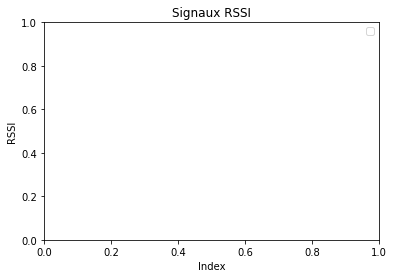

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que dRSSI_0, dRSSI_1, dRSSI_2, dRSSI_3 sont vos DataFrames respectifs
# Concaténer les DataFrames horizontalement pour avoir un seul DataFrame avec toutes les données
df = pd.concat([dRSSI_0, dRSSI_1, dRSSI_2, dRSSI_3], ignore_index=True)

# Supprimer la première ligne contenant des NaN
df = df.dropna(axis=0)

# Diviser les données en signaux RSSI et positions
signals = df[['x', 'y', 'RSSI']]

# Tracer les signaux RSSI
for index, row in signals.iterrows():
    plt.plot(row['RSSI'], label=f'Position: ({row["x"]}, {row["y"]})')

plt.title('Signaux RSSI')
plt.xlabel('Index')
plt.ylabel('RSSI')
plt.legend()
plt.show()


In [45]:
dRSSI_0.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,x,y,RSSI
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-59.725737,-59.565726,-59.402224,-59.235079,-59.090795,-58.915865,-58.736769,-58.553310,-58.365273,-58.172431,-57.974538,-57.771330,-57.562524,-57.347812,-57.153528,-56.925982,-56.691449,-56.449507,-56.199696,-55.941516,-52.483802,-52.199003,-51.903303,-51.515645,-51.191321,-50.879574,-50.525884,-50.155592,-49.793879,-49.385752,-48.982694,-48.529311,-48.076667,-47.595628,-47.083587,-46.537926,-45.956285,-45.363756,-44.347208,-43.130428,-41.890607,-40.316714,-38.842864,-37.440082,-36.177590,-35.930786,-36.057593,-36.386753,-36.982869,-37.680053,NaN
-62.864795,-62.707834,-62.499805,-62.334798,-62.166085,-61.993498,-61.816860,-61.635980,-61.450656,-61.260668,-61.065783,-60.892417,-60.686967,-60.475807,-60.258624,-60.035079,-56.647754,-56.405612,-56.077073,-55.815306,-55.544270,-55.263315,-54.971729,-54.695391,-54.380098,-54.051554,-53.708694,-53.350339,-53.001851,-52.608459,-52.195252,-48.457681,-48.004248,-47.303621,-46.770160,-46.171475,-45.556999,-44.896389,-44.187026,-43.455719,-42.682084,-41.718181,-40.052291,-37.815059,-35.822309,-34.895363,-34.988979,-35.515064,-36.225631,-37.588934,NaN
-61.294216,-61.135160,-59.394452,-59.226864,-59.055489,-58.880158,-58.700689,-58.516892,-58.328559,-58.135471,-57.937394,-57.734075,-57.525245,-57.310613,-57.089869,-56.862678,-55.018144,-54.773351,-54.442521,-54.175932,-53.899835,-53.613573,-53.316422,-53.007589,-52.686203,-52.351304,-52.001844,-51.636672,-51.254539,-50.854096,-48.262965,-49.334961,-48.858562,-45.665378,-45.000952,-44.387020,-43.727065,-43.016253,-42.250380,-41.427471,-40.577866,-39.664414,-38.781607,-38.013255,-37.575112,-32.758729,-32.821782,-33.399928,-36.740865,-38.026355,NaN
-61.393138,-61.234277,-59.492554,-59.325155,-59.153981,-58.978865,-58.799627,-58.616077,-58.428010,-58.235210,-58.037442,-57.834458,-57.625992,-57.411755,-57.191442,-56.964723,-55.118837,-54.874539,-53.496073,-53.229898,-52.954264,-52.668521,-52.371955,-52.110452,-51.789820,-51.455785,-51.107318,-50.743298,-50.362509,-49.963645,-48.464193,-48.014097,-47.539412,-45.869816,-44.177641,-43.566515,-42.956813,-42.250657,-41.537576,-40.769495,-39.997484,-39.191853,-38.440780,-37.873343,-35.460216,-31.421450,-30.960219,-33.477658,-36.979989,-38.205301,NaN


In [61]:
dRSSI_0.isna().sum()

1      1
2      1
3      2
4      5
5      2
      ..
68    74
69    74
70    74
71    74
72    74
Length: 72, dtype: int64

In [62]:
dRSSI_1.isna().sum()

1      1
2      1
3      2
4      2
5      2
      ..
68    74
69    74
70    74
71    74
72    74
Length: 72, dtype: int64

In [63]:
dRSSI_2.isna().sum()

1      1
2      2
3      2
4      3
5      2
      ..
68    74
69    74
70    74
71    74
72    74
Length: 72, dtype: int64

In [64]:
dRSSI_3.isna().sum()

1      2
2      2
3      2
4      2
5      2
      ..
68    74
69    74
70    74
71    74
72    74
Length: 72, dtype: int64

## Question 2

Proposer une méthode pour compléter les données manquantes

R: il n'y a que quelque données manquantes dans les colonnes donc on fera une moyenne de toutes les autres données de la même colonne et on remplacera les données manquantes par la moyenne de sa colonne respective à chaque fois . A l'exception de la dernière colonne de chaque dataframe que l'on supprimera car elle nous sert à rien.

In [46]:

dRSSI_0 = dRSSI_0.iloc[:, :-1]
dRSSI_1 = dRSSI_1.iloc[:, :-1]
dRSSI_2 = dRSSI_2.iloc[:, :-1]
dRSSI_3 = dRSSI_3.iloc[:, :-1]

dRSSI_0 = dRSSI_0.apply(lambda col: col.fillna(col.mean()))
dRSSI_1 = dRSSI_1.apply(lambda col: col.fillna(col.mean()))
dRSSI_2 = dRSSI_2.apply(lambda col: col.fillna(col.mean()))
dRSSI_3 = dRSSI_3.apply(lambda col: col.fillna(col.mean()))

dRSSI_0.head()


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,x,y
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.934161,-50.241256
-59.725737,-59.565726,-59.402224,-59.235079,-59.090795,-58.915865,-58.736769,-58.553310,-58.365273,-58.172431,-57.974538,-57.771330,-57.562524,-57.347812,-57.153528,-56.925982,-56.691449,-56.449507,-56.199696,-55.941516,-52.483802,-52.199003,-51.903303,-51.515645,-51.191321,-50.879574,-50.525884,-50.155592,-49.793879,-49.385752,-48.982694,-48.529311,-48.076667,-47.595628,-47.083587,-46.537926,-45.956285,-45.363756,-44.347208,-43.130428,-41.890607,-40.316714,-38.842864,-37.440082,-36.177590,-35.930786,-36.057593,-36.386753,-36.982869,-37.680053
-62.864795,-62.707834,-62.499805,-62.334798,-62.166085,-61.993498,-61.816860,-61.635980,-61.450656,-61.260668,-61.065783,-60.892417,-60.686967,-60.475807,-60.258624,-60.035079,-56.647754,-56.405612,-56.077073,-55.815306,-55.544270,-55.263315,-54.971729,-54.695391,-54.380098,-54.051554,-53.708694,-53.350339,-53.001851,-52.608459,-52.195252,-48.457681,-48.004248,-47.303621,-46.770160,-46.171475,-45.556999,-44.896389,-44.187026,-43.455719,-42.682084,-41.718181,-40.052291,-37.815059,-35.822309,-34.895363,-34.988979,-35.515064,-36.225631,-37.588934
-61.294216,-61.135160,-59.394452,-59.226864,-59.055489,-58.880158,-58.700689,-58.516892,-58.328559,-58.135471,-57.937394,-57.734075,-57.525245,-57.310613,-57.089869,-56.862678,-55.018144,-54.773351,-54.442521,-54.175932,-53.899835,-53.613573,-53.316422,-53.007589,-52.686203,-52.351304,-52.001844,-51.636672,-51.254539,-50.854096,-48.262965,-49.334961,-48.858562,-45.665378,-45.000952,-44.387020,-43.727065,-43.016253,-42.250380,-41.427471,-40.577866,-39.664414,-38.781607,-38.013255,-37.575112,-32.758729,-32.821782,-33.399928,-36.740865,-38.026355
-61.393138,-61.234277,-59.492554,-59.325155,-59.153981,-58.978865,-58.799627,-58.616077,-58.428010,-58.235210,-58.037442,-57.834458,-57.625992,-57.411755,-57.191442,-56.964723,-55.118837,-54.874539,-53.496073,-53.229898,-52.954264,-52.668521,-52.371955,-52.110452,-51.789820,-51.455785,-51.107318,-50.743298,-50.362509,-49.963645,-48.464193,-48.014097,-47.539412,-45.869816,-44.177641,-43.566515,-42.956813,-42.250657,-41.537576,-40.769495,-39.997484,-39.191853,-38.440780,-37.873343,-35.460216,-31.421450,-30.960219,-33.477658,-36.979989,-38.205301


In [25]:
dRSSI_0.isna().sum()

x    0
y    0
dtype: int64

## Question 3

Construire l'ensemble d'apprentissage du réseau qui met en correspondance les 4 forces du signal et la position $(f_1,f_2,f_3,f_4) ⟶(x,y)$.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supposons que dRSSI_0, dRSSI_1, dRSSI_2, dRSSI_3 sont vos DataFrames respectifs

# Concaténer les DataFrames horizontalement pour avoir un seul DataFrame avec toutes les données
df = pd.concat([dRSSI_0, dRSSI_1, dRSSI_2, dRSSI_3], ignore_index=True)

# Supprimer la dernière colonne de chaque DataFrame (si nécessaire)
df = df.iloc[:, :-1]

# Diviser les données en entrées (X) et sorties (y)
X = df.iloc[:, :4]  # Forces du signal (f1, f2, f3, f4)
y = df.iloc[:, 4:]  # Positions (x, y)

# Diviser l'ensemble de données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
X_train.shape

(236, 1)

## Question 4

Proposer en argumantant vos choix un réseau de neurone dense avec un fonction Loss appropriée.

In [53]:

# Convertir les DataFrames en tableaux NumPy
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Création du modèle
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,466
Trainable params: 2,466
Non-trainable params: 0
_________________________________________________________________


On choisit un modèle sequentiel de 64 couches

## Question 5

En utilisant la métrique "R2 score" et en séparant les données en un ensemble d'apprentissage et un ensemble de test entrainer votre réseau.

Tracer l'historique de l'évolution de la fonction Loss et de la métrique R2

In [ ]:
# Calcul du R2 score
r2_score_value = r2_score(y_test, y_pred)
print(f'R2 Score sur l\'ensemble de test: {r2_score_value}')

# Affichage de l'historique de la fonction Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la Fonction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Question 6

Tracer l'histogramme des distances obtenues entre la position prédites et celle voulue

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prédiction des positions avec le modèle
y_pred = model.predict(X_test)

# Calcul des distances euclidiennes entre les positions prédites et réelles
distances = np.sqrt(np.sum((y_pred - y_test)**2, axis=1))

# Tracer l'histogramme des distances
plt.hist(distances, bins=20, color='blue', alpha=0.7)
plt.title('Histogramme des distances entre positions prédites et réelles')
plt.xlabel('Distance euclidienne')
plt.ylabel('Fréquence')
plt.show()


## Question 7

Conclure et donner la précision de votre systeme de localisation.

R: le système est peut être précis , peut être pas , après tout la précision est une donnée relative ne donnant qu'une vision parcellaire de la réalité. c'est ainsi que Leibniz opposa à John Locke la notion de petites perception , face à la persistance de John Locke à ne considérer que l'expérience comme représentation possible du monde sensible.

## Question 8

Proposer une amélioration de votre modèle

R : On pourrait partir des dataframes , afficher les cartes RSSI correspondantes , les diviser en plusieurs sous-images qui se superposent puis réaliser d'autres dataframes contenant toutes les sous-images , et tenter un modèle convolutif.

## Question 9

Partager votre fil de discution ChatGPT ou autre ici.

https://chat.openai.com/share/00e72b67-d26c-4b9f-9f1d-345d1cb4a093
https://chat.openai.com/share/91b00c91-b696-4637-b646-68d6e1762080